# Mahindra & Mahindra Data Analysis and Binary classification

In [2]:
#Importing DATA calucation and manipulation libraries
import numpy as np
import pandas as pd

#Importing neccessary plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#to ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [99]:
#reading the csv files using pandas
train = pd.read_csv("training_dataset.csv")
test1 = pd.read_csv("test1_data.csv")
test2 = pd.read_csv("test2_data.csv")
print('Data frame Dimensions::\nTRAIN:{}\nTEST1:{}\nTEST2:{}'.format(train.shape,test1.shape,test2.shape))

Data frame Dimensions::
TRAIN:(199609, 29)
TEST1:(90718, 28)
TEST2:(72581, 28)


In [100]:
train.head()  #showing the first 5 rows of dataframe

,Variable1,Variable2,Variable3,Variable4,Variable5,Variable6,Variable7,Variable8,Variable9,Variable10,...,Variable20,Variable21,Variable22,Variable23,Variable24,Variable25,Variable26,Variable27,Variable28,Target
0,1,ARO-4742,1,APHRNG1692,May-16,N,9.314022e+09,Col-6930,PKSA016674,USG1,...,NaN,NaN,VAR SULP TT3 PS,NaN,N,NaN,COM2,1150.0,MFTRC322,0
1,2,ARO-4928,2,APFPTV9946,Feb-17,N,9.251002e+09,Col-6930,PA2Z013889,USG4,...,NaN,NaN,VAR SULP TT4,NaN,N,NaN,COM1,1150.0,MFTRC322,0
2,3,ARO-3778,2,APHRNG1692,Dec-15,NaN,9.451552e+09,Col-4259,PCEM018562,USG4,...,NaN,NaN,VAR SULP DI TT3,NaN,N,NaN,COM3,1150.0,MFTRC322,0
3,4,ARO-4998,1,APFPTV154265,Sep-16,N,9.416109e+09,Col-4259,PTRW14933,USG4,...,NaN,NaN,VAR SULP DI TT3 PS,NaN,N,NaN,COM1,1000.0,MFTRC322,0
4,5,ARO-3627,2,APHRNG1692,Feb-16,N,9.500040e+09,Col-4259,PAM0026696,USG1,...,NaN,NaN,VAR SULP TT4 PS,NaN,N,NaN,COM1,1150.0,MAHEC465,0


## Exploratory Data Analysis

In [101]:
#Showing Meta data:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199609 entries, 0 to 199608
Data columns (total 29 columns):
Variable1     199609 non-null int64
Variable2     199609 non-null object
Variable3     199609 non-null int64
Variable4     199609 non-null object
Variable5     199609 non-null object
Variable6     153218 non-null object
Variable7     188074 non-null float64
Variable8     199609 non-null object
Variable9     199609 non-null object
Variable10    199609 non-null object
Variable11    199609 non-null object
Variable12    162791 non-null float64
Variable13    199609 non-null object
Variable14    199609 non-null object
Variable15    199609 non-null object
Variable16    24905 non-null float64
Variable17    199609 non-null object
Variable18    141070 non-null object
Variable19    199609 non-null object
Variable20    23829 non-null object
Variable21    0 non-null float64
Variable22    199609 non-null object
Variable23    39483 non-null object
Variable24    199609 non-null object
Variabl

In [215]:
print('Descriptive Statastics of our Training Data:')
train.describe().T

Descriptive Statastics of our Training Data:


,count,mean,std,min,25%,50%,75%,max
Variable1,199609.0,9.980500e+04,5.762230e+04,1.000000e+00,4.990300e+04,9.980500e+04,1.497070e+05,1.996090e+05
Variable3,199609.0,3.629831e+00,2.273030e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,9.000000e+00
Variable7,188074.0,9.437428e+09,1.937600e+08,9.110001e+09,9.262702e+09,9.442907e+09,9.591303e+09,9.855457e+09
Variable12,162791.0,1.686957e+02,1.533836e+02,1.000000e+00,8.000000e+01,1.100000e+02,1.900000e+02,6.500000e+02
Variable16,24905.0,2.117606e+02,5.882970e+03,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+05
Variable21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Variable27,165446.0,1.433633e+03,5.886596e+02,1.000000e+00,1.150000e+03,1.150000e+03,1.600000e+03,3.000000e+03
Target,199609.0,1.698270e-01,3.754817e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [216]:
#Checking for missing values
pd.isnull(train).sum()

Variable1          0
Variable2          0
Variable3          0
Variable4          0
Variable5          0
Variable6      46391
Variable7      11535
Variable8          0
Variable9          0
Variable10         0
Variable11         0
Variable12     36818
Variable13         0
Variable14         0
Variable15         0
Variable16    174704
Variable17         0
Variable18     58539
Variable19         0
Variable20    175780
Variable21    199609
Variable22         0
Variable23    160126
Variable24         0
Variable25    182801
Variable26         0
Variable27     34163
Variable28         0
Target             0
dtype: int64

Yes, missing values are present in some of the features in our dataset. 

In [217]:
# Checking the percentage of missing values in the features
round((pd.isnull(train).sum()/len(train))*100, 2)

Variable1       0.00
Variable2       0.00
Variable3       0.00
Variable4       0.00
Variable5       0.00
Variable6      23.24
Variable7       5.78
Variable8       0.00
Variable9       0.00
Variable10      0.00
Variable11      0.00
Variable12     18.45
Variable13      0.00
Variable14      0.00
Variable15      0.00
Variable16     87.52
Variable17      0.00
Variable18     29.33
Variable19      0.00
Variable20     88.06
Variable21    100.00
Variable22      0.00
Variable23     80.22
Variable24      0.00
Variable25     91.58
Variable26      0.00
Variable27     17.11
Variable28      0.00
Target          0.00
dtype: float64

In [109]:
#concating(combining) train and test data sets 
data = pd.concat([train.drop('Target',axis=1),test1,test2],axis = 0)

print("Dimensions of Combined data: {} ".format(data.shape))

Dimensions of Combined data: (362908, 28) 


In [110]:
#Dropping the features with more than 60% of missing values
data.drop(['Variable16','Variable20','Variable21','Variable23', 'Variable25'],axis = 1,inplace=True)

In [111]:
#Dropping variable1 since it is a serial number and not a useful feature for analysis:
data.drop(['Variable1'],axis = 1,inplace = True)

## Distribution of Variables (Univariate Analysis)

In [112]:
data.head(3)

,Variable2,Variable3,Variable4,Variable5,Variable6,Variable7,Variable8,Variable9,Variable10,Variable11,...,Variable14,Variable15,Variable17,Variable18,Variable19,Variable22,Variable24,Variable26,Variable27,Variable28
0,ARO-4742,1,APHRNG1692,May-16,N,9.314022e+09,Col-6930,PKSA016674,USG1,LOTYPE1000,...,B191,Type-206,MFTRV9754,N,LKSA18434,VAR SULP TT3 PS,N,COM2,1150.0,MFTRC322
1,ARO-4928,2,APFPTV9946,Feb-17,N,9.251002e+09,Col-6930,PA2Z013889,USG4,LOTYPE500,...,C818,Type-367,MFTRV9754,N,LA2Z11295,VAR SULP TT4,N,COM1,1150.0,MFTRC322
2,ARO-3778,2,APHRNG1692,Dec-15,NaN,9.451552e+09,Col-4259,PCEM018562,USG4,LOTYPE1000,...,E919,Type-206,MFTRV9754,NaN,LCEM41939,VAR SULP DI TT3,N,COM3,1150.0,MFTRC322


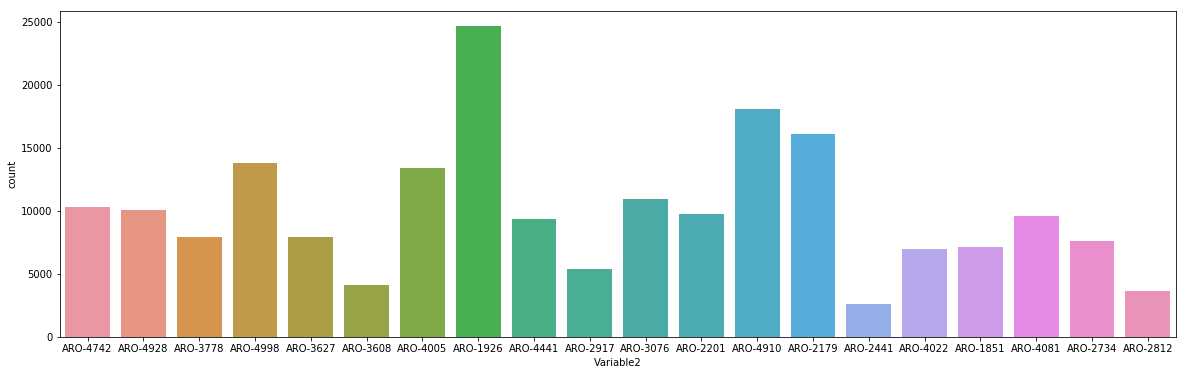

In [113]:
#Variable2:
plt.figure(figsize=[20,6])
sns.countplot(train.Variable2)
plt.show()

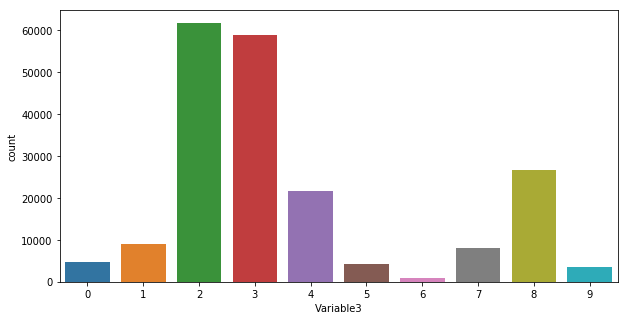

In [15]:
#Variable3:
plt.figure(figsize=[10,5])
sns.countplot(train.Variable3)
plt.show()

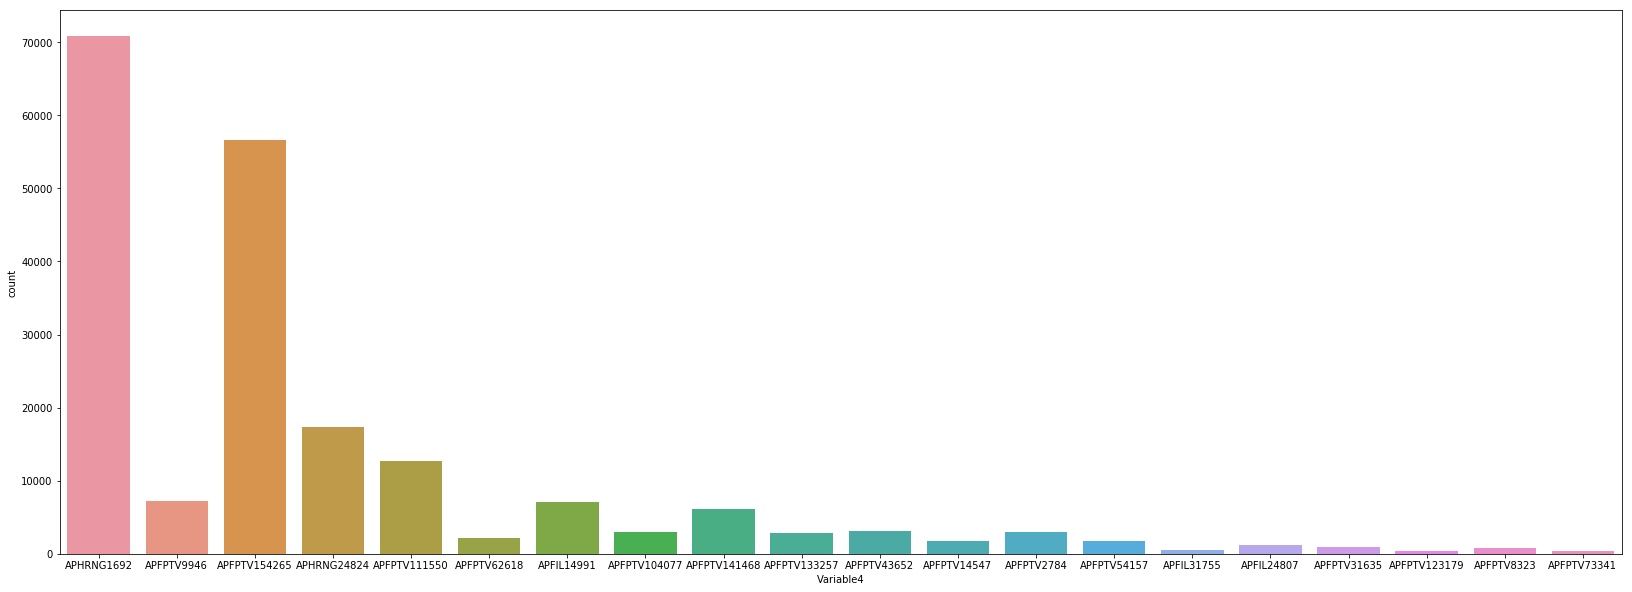

In [16]:
#Variable4:
plt.figure(figsize=[28,10])
sns.countplot(train.Variable4)
plt.show()

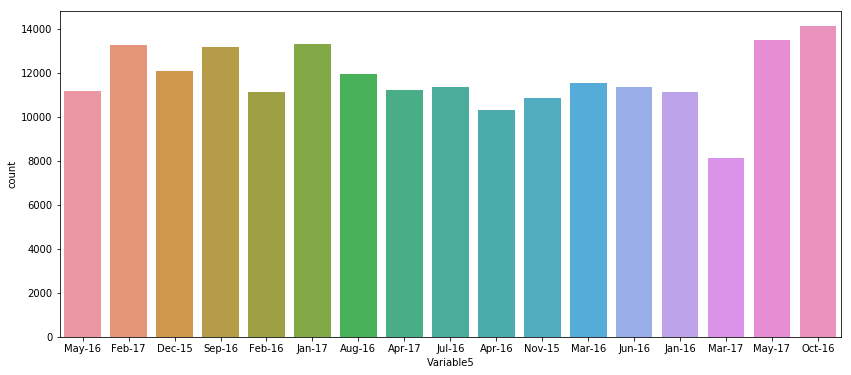

In [17]:
#Variable5:
plt.figure(figsize=[14,6])
sns.countplot(train.Variable5)
plt.show()

In [18]:
train.Variable9.value_counts().count() #there are 270 different categories are present in Variable9

270

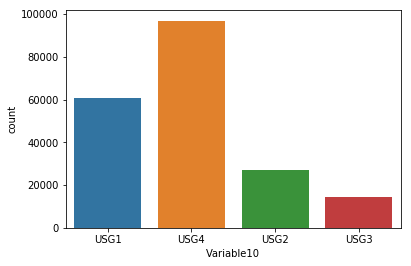

In [19]:
#Variable10:
plt.figure(figsize=[6,4])
sns.countplot(train.Variable10)
plt.show()

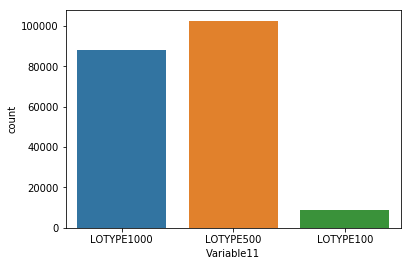

In [20]:
#Variable11:
plt.figure(figsize=[6,4])
sns.countplot(train.Variable11)
plt.show()

In [21]:
train.Variable13.value_counts().count() #there are 24 different categories are present in Variable13

24

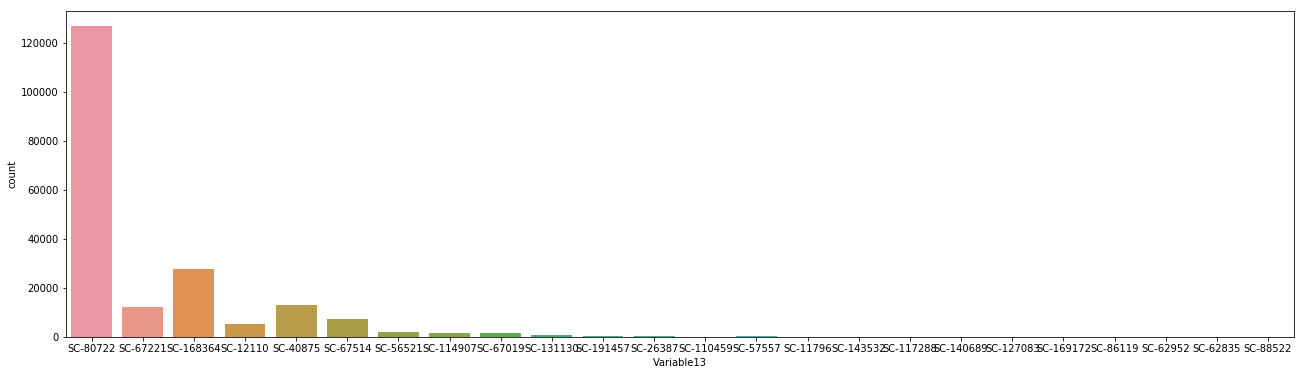

In [22]:
#Variable13:
plt.figure(figsize=[22,6])
sns.countplot(train.Variable13)
plt.show()

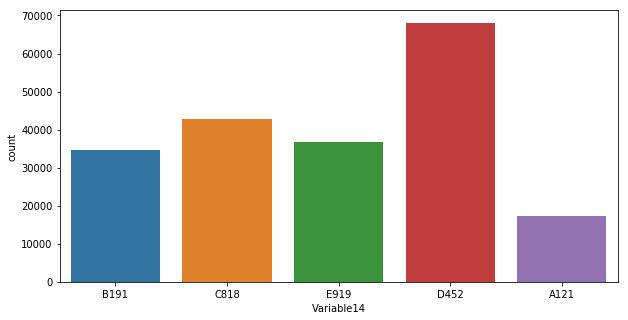

In [23]:
#Variable14:
plt.figure(figsize=[10,5])
sns.countplot(train.Variable14)
plt.show()

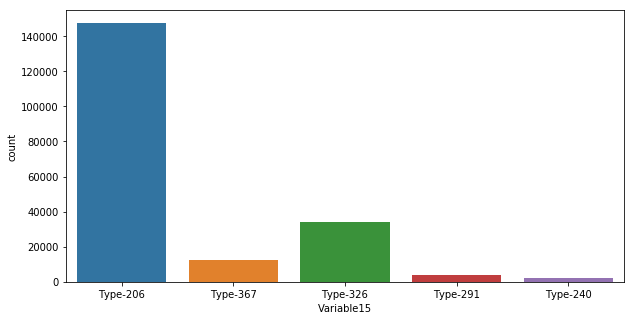

In [24]:
#Variable15
plt.figure(figsize=[10,5])
sns.countplot(train.Variable15)
plt.show()

In [25]:
train.Variable17.value_counts().count() #there are 17 different categories are present in Variable13

17

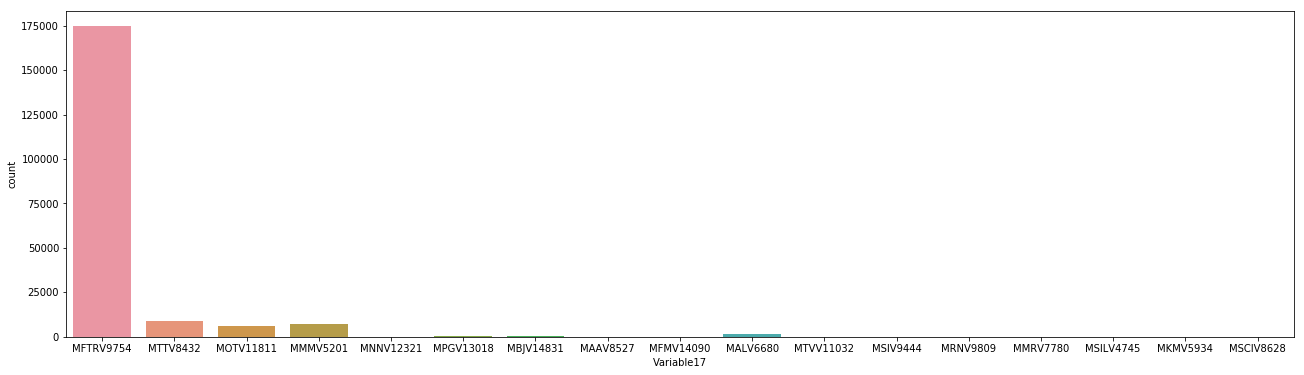

In [26]:
plt.figure(figsize=[22,6])
sns.countplot(train.Variable17)
plt.show()

In [27]:
train.Variable19.value_counts().count() #there are 540 different categories are present in Variable19

540

In [28]:
train.Variable22.value_counts().count() #there are 16 different categories are present in Variable22

16

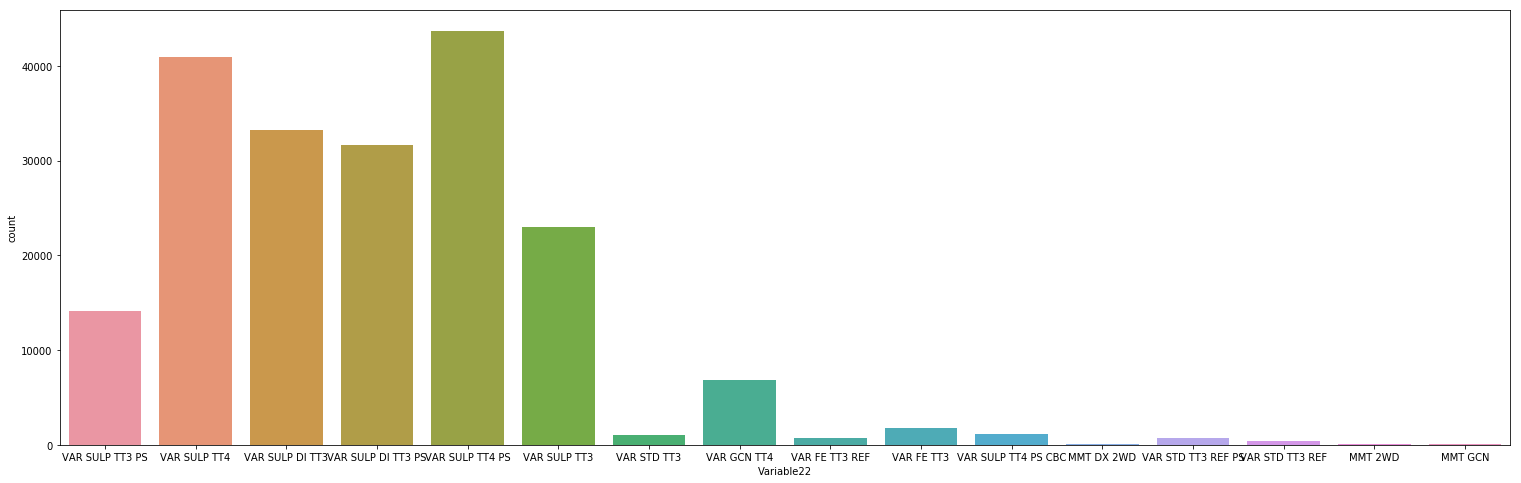

In [29]:
plt.figure(figsize=[26,8])
sns.countplot(train.Variable22)
plt.show()

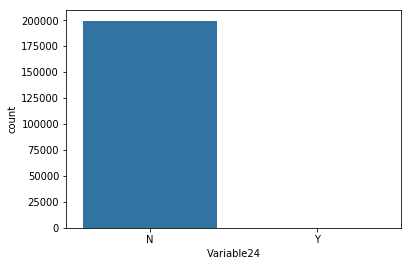

In [30]:
#Variable 24
sns.countplot(train.Variable24)

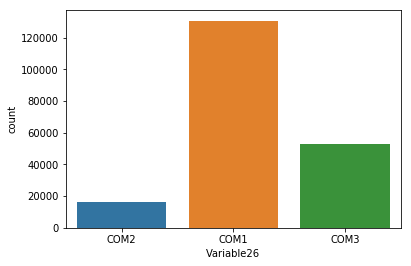

In [31]:
plt.figure(figsize=[6,4])
sns.countplot(train.Variable26)
plt.show()

In [32]:
train.Variable28.value_counts().count() #there are 63 different categories are present in Variable28

63

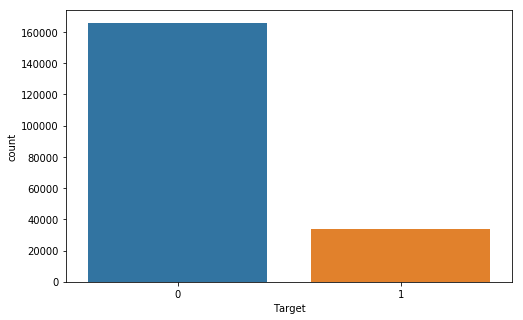

In [33]:
#Distribution of Target Feature
plt.figure(figsize=[8,5])
sns.countplot(train.Target)
plt.show()

## Missing value Treatment

In [114]:
#Duplicating the dataframes inorder to preserve the data in main datasets
df = data.copy()

In [115]:
#imputing missing values using simple imputer library
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent',copy=True)
imputer2 = SimpleImputer(missing_values=np.nan, strategy='median',copy=True)

df[['Variable6','Variable18']] = imputer1.fit_transform(df[['Variable6','Variable18']])
df[['Variable7','Variable12','Variable27']] = imputer2.fit_transform(df[['Variable7','Variable12','Variable27']])

In [116]:
print('Missing value counts in our data:: \n{}'.format(pd.isnull(df).sum()))

Missing value counts in our data:: 
Variable2     0
Variable3     0
Variable4     0
Variable5     0
Variable6     0
Variable7     0
Variable8     0
Variable9     0
Variable10    0
Variable11    0
Variable12    0
Variable13    0
Variable14    0
Variable15    0
Variable17    0
Variable18    0
Variable19    0
Variable22    0
Variable24    0
Variable26    0
Variable27    0
Variable28    0
dtype: int64


Now, there are no missing values are present in our datasets as all are imputed.

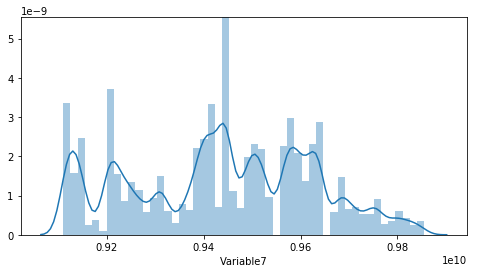

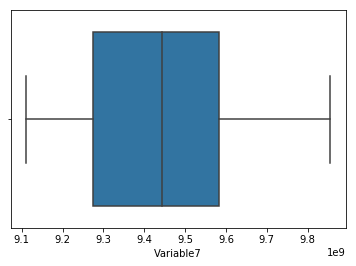

In [117]:
#Variable7 distribution
plt.figure(figsize=[8,4])
sns.distplot(df.Variable7,kde=True)
plt.show()
sns.boxplot(df.Variable7)
plt.show()

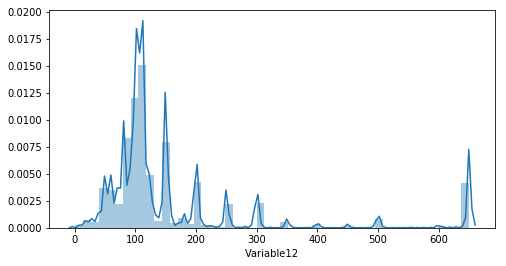

In [118]:
plt.figure(figsize=[8,4])
sns.distplot(df.Variable12,kde=True)
plt.show()

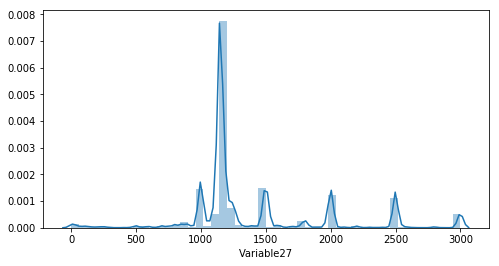

In [119]:
plt.figure(figsize=[8,4])
sns.distplot(df.Variable27,kde=True)
plt.show()

In [120]:
#since there are more levels in variables 7,12,27 we can consider them as continuous.
print(df.Variable7.value_counts().count())
print(df.Variable12.value_counts().count())
print(df.Variable27.value_counts().count())

13961
414
762


### Reducing categorical levels

In univariate analysis, we found that some of the variables are having more categories in it.. so we should ave to reduce the no. of levels by equating the categories which are less than threshold level to 'others'

In [121]:
df1 = df.copy()

In [122]:
#extrating month:
import re

def get_month(x):
    month = re.findall(r'\w+',x)[0]
    return month

df1['Variable5'] = df1['Variable5'].apply(get_month)
df1.Variable5.value_counts()

Jan    44717
May    44575
Feb    44460
Apr    39042
Mar    35688
Oct    25683
Sep    24067
Dec    22039
Aug    21635
Jul    20838
Jun    20618
Nov    19546
Name: Variable5, dtype: int64

In [123]:
#Variable 4
threshold = 1000 #whatever value that makes sense to you
l = []

for i in list(df1['Variable4'].unique()):
     if len(df1.loc[df1['Variable4'] == i]) < threshold:
            l.append(i) 

df1['Variable4'] =  df1['Variable4'].replace(l,'others')

In [124]:
#Variable 8
threshold = 5000
l = []

for i in list(df1['Variable8'].unique()):
     if len(df1.loc[df1['Variable8'] == i]) < threshold:
            l.append(i)      

df1['Variable8'] =  df1['Variable8'].replace(l,'others')

In [125]:
#Variable 9
threshold = 900
l = []

for i in list(df1['Variable9'].unique()):
     if len(df1.loc[df1['Variable9'] == i]) < threshold:
            l.append(i)      

df1['Variable9'] =  df1['Variable9'].replace(l,'others')

In [126]:
#Variable 13
threshold = 9000
l = []

for i in list(df1['Variable13'].unique()):
     if len(df1.loc[df1['Variable13'] == i]) < threshold:
            l.append(i)      

df1['Variable13'] =  df1['Variable13'].replace(l,'others')

In [127]:
#Variable 17
threshold = 10000
l = []

for i in list(df1['Variable17'].unique()):
     if len(df1.loc[df1['Variable17'] == i]) < threshold:
            l.append(i)      

df1['Variable17'] =  df1['Variable17'].replace(l,'others')

In [128]:
#Variable 19
threshold = 700
l = []

for i in list(df1['Variable19'].unique()):
     if len(df1.loc[df1['Variable19'] == i]) < threshold:
            l.append(i)      

df1['Variable19'] =  df1['Variable19'].replace(l,'others')

In [129]:
#Variable 22
threshold = 10000
l = []

for i in list(df1['Variable22'].unique()):
     if len(df1.loc[df1['Variable22'] == i]) < threshold:
            l.append(i)      

df1['Variable22'] =  df1['Variable22'].replace(l,'others')

In [130]:
#Variable 28
threshold = 2000
l = []

for i in list(df1['Variable28'].unique()):
     if len(df1.loc[df1['Variable28'] == i]) < threshold:
            l.append(i)      

df1['Variable28'] =  df1['Variable28'].replace(l,'others')

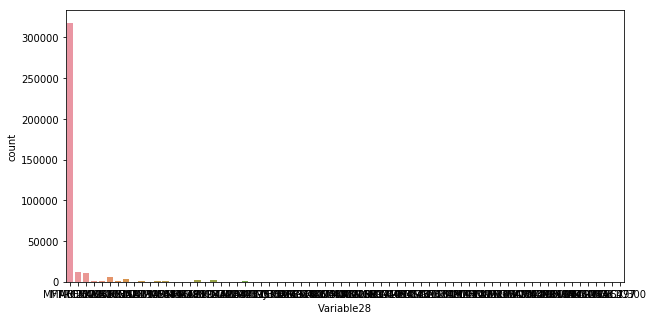

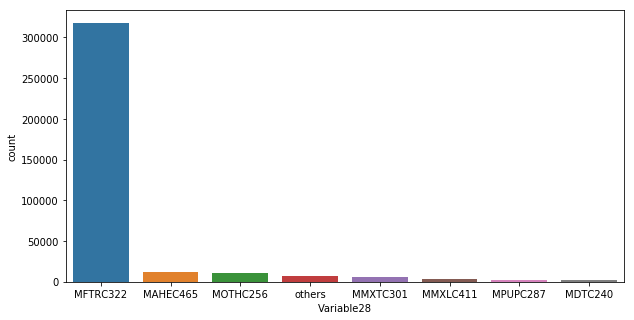

In [219]:
#Variable28 distribution before reducing levels
plt.figure(figsize=[10,5])
sns.countplot(df['Variable28'])
plt.show()
#Variable28 didtribution after:
plt.figure(figsize=[10,5])
sns.countplot(df1['Variable28'])
plt.show()

we can observe above that the number of levels in variable28 are significantly reduced from 63 to 8 levels(mapping low frequency levels with others)

### Feature Encoding

In [132]:
#getting a list of categorical variables
a = ['Variable7','Variable12','Variable27'] #considering continous since levels are high
cat = []

for i in list(df1.columns):
    if i not in a:
        cat.append(i)
print(cat)

['Variable2', 'Variable3', 'Variable4', 'Variable5', 'Variable6', 'Variable8', 'Variable9', 'Variable10', 'Variable11', 'Variable13', 'Variable14', 'Variable15', 'Variable17', 'Variable18', 'Variable19', 'Variable22', 'Variable24', 'Variable26', 'Variable28']


In [133]:
#using One hot encoding for all Nominal categorical variables
df_oh = pd.get_dummies(df1, columns = cat, drop_first=True)
df_oh.head()

,Variable7,Variable12,Variable27,Variable2_ARO-1926,Variable2_ARO-2179,Variable2_ARO-2201,Variable2_ARO-2441,Variable2_ARO-2734,Variable2_ARO-2812,Variable2_ARO-2917,...,Variable24_Y,Variable26_COM2,Variable26_COM3,Variable28_MDTC240,Variable28_MFTRC322,Variable28_MMXLC411,Variable28_MMXTC301,Variable28_MOTHC256,Variable28_MPUPC287,Variable28_others
0,9.314022e+09,180.0,1150.0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,9.251002e+09,80.0,1150.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9.451552e+09,100.0,1150.0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,9.416109e+09,300.0,1000.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9.500040e+09,100.0,1150.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Chi-square test of Independence 

In [134]:
df_cat = df_oh[:len(train)].drop(['Variable7','Variable12','Variable27'],axis = 1)
cat_oh = list(df_cat.columns)
df_cat.shape

(199609, 410)

In [135]:
#performing chi_square test to know the significant features
from scipy.stats import chisquare,chi2_contingency
cat_col = []
chi_pvalue = []
chi_name = []

def chi_sq(i):
    ct = pd.crosstab(df_cat[i],train['Target'])
    chi_pvalue.append(chi2_contingency(ct)[1])
    chi_name.append(i)

for i in cat_oh:
    chi_sq(i)

chi_data = pd.DataFrame()
chi_data['Pvalue'] = chi_pvalue
chi_data.index = chi_name

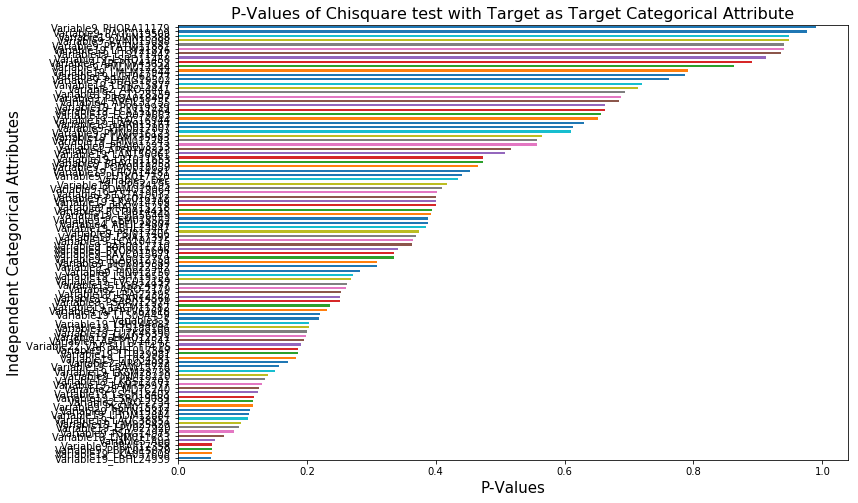

There are 100 insignificant features which are having P-value > 0.05


In [136]:
plt.figure(figsize=[12,8])
plt.title('P-Values of Chisquare test with ''Target'' as Target Categorical Attribute',fontsize=16)
cd = chi_data[chi_data['Pvalue'] > 0.05].Pvalue.sort_values()
x = cd.plot(kind='barh')
x.set_xlabel('P-Values',fontsize=15)
x.set_ylabel('Independent Categorical Attributes',fontsize=15)
plt.show()
print('There are {} insignificant features which are having P-value > 0.05'.format(len(cd)))

In [137]:
#filtering the list of only significant features
insig_features = list(cd.index)
significant = []

for i in df_oh.columns:
    if i not in insig_features:
        significant.append(i)

### Scaling data 

In [138]:
from sklearn.preprocessing import MinMaxScaler

In [220]:
df_oh[significant].shape

(362908, 313)

In [140]:
#Scaling all the features to the same scale using min max scaler:
scaler = MinMaxScaler()
features = df_oh[significant]

df_std = scaler.fit_transform(features)
df_std = pd.DataFrame(df_std,columns = features.columns)

In [141]:
df_std.head(3)

,Variable7,Variable12,Variable27,Variable2_ARO-1926,Variable2_ARO-2201,Variable2_ARO-2441,Variable2_ARO-2812,Variable2_ARO-2917,Variable2_ARO-3076,Variable2_ARO-3608,...,Variable22_others,Variable24_Y,Variable26_COM2,Variable26_COM3,Variable28_MFTRC322,Variable28_MMXLC411,Variable28_MMXTC301,Variable28_MOTHC256,Variable28_MPUPC287,Variable28_others
0,0.273686,0.275809,0.383128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.189147,0.121726,0.383128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.458177,0.152542,0.383128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## Model Building

In [143]:
# importing classification model building libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
# Importing train-test-split and performance metrices
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report,roc_curve, auc

In [144]:
X = df_std[:len(train)] #training independent feature set
Y = train['Target'] #training target feature set
T1 = df_std[len(train):len(train)+len(test1)] #scaled test1 data
T2 = df_std[len(train)+len(test1):]   #scaled test2 data

# Splitting the data into train and validation sets
xtrain, xval, ytrain, yval = train_test_split(X,Y,test_size=0.2, random_state = 25)
xtrain.shape,xval.shape

((159687, 313), (39922, 313))

In [147]:
T1.shape,T2.shape #Dimensions of test1 and test2

((90718, 313), (72581, 313))

### DATA SAMPLING

#### Downsampling

In [148]:
train_df = xtrain.copy()
train_df['Target'] = ytrain
# Separating majority and minority classes
majority = train_df[train_df.Target==0]
minority = train_df[train_df.Target==1]
minority.shape,majority.shape

((27070, 314), (132617, 314))

In [149]:
from sklearn.utils import resample

n_samples = int(len(minority)*1.5)

majority_ds = resample(majority, replace=False, n_samples = n_samples, random_state=25)
 
# Combine minority class with downsampled majority class
train_ds = pd.concat([majority_ds,minority])
 
# Display new class counts
train_ds.Target.value_counts()

0    40605
1    27070
Name: Target, dtype: int64

In [150]:
xtrain_ds = train_ds.drop(['Target'],axis=1)
ytrain_ds = train_ds['Target']

#### 2.Upsampling 

In [152]:
from imblearn.over_sampling import SMOTE

print("Before UpSampling, counts of label '1': {}".format(sum(ytrain==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(ytrain==0)))

smt = SMOTE(sampling_strategy=0.75,k_neighbors=11,random_state = 25)   #Synthetic Minority Over Sampling Technique
xtrain_us, ytrain_us = smt.fit_sample(xtrain,ytrain)

print("After UpSampling, counts of label '1': {}".format(sum(ytrain_us==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(ytrain_us==0)))

Before UpSampling, counts of label '1': 27070
Before UpSampling, counts of label '0': 132617 

After UpSampling, counts of label '1': 99462
After UpSampling, counts of label '0': 132617 



### 1.logistic regression

In [221]:
logistic = LogisticRegression(random_state=25)
logistic.fit(xtrain,ytrain)
y_pred = logistic.predict(xval)

print(classification_report(yval, y_pred))
print(confusion_matrix(yval,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     33093
           1       0.71      0.46      0.56      6829

   micro avg       0.88      0.88      0.88     39922
   macro avg       0.81      0.71      0.74     39922
weighted avg       0.87      0.88      0.87     39922

[[31833  1260]
 [ 3682  3147]]


In [222]:
score = accuracy_score(yval,y_pred)
recall = recall_score(yval,y_pred)
precision = precision_score(yval,y_pred)
f1score = f1_score(yval,y_pred)
training = logistic.score(xtrain,ytrain)
fpr,tpr, _ = roc_curve(yval, y_pred)
roc_auc = auc(fpr,tpr)

log_results = pd.DataFrame({'Classifier':['Logistic'], 'Training Accuracy':[training],
                          'Validation Accuracy': [score],'Recall':[recall],
                          'Precision':[precision],'F1 Score':[f1score],'AUC':[roc_auc]})

log_results

,Classifier,Training Accuracy,Validation Accuracy,Recall,Precision,F1 Score,AUC
0,Logistic,0.876277,0.876209,0.460829,0.714091,0.560164,0.711377


### 2.Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
#for decision tree: 
#parameter={'max_depth':np.arange(1,25),'criterion':['gini','entropy']}
#gs = GridSearchCV(dt,parameter,cv=3)
#gs.fit(xtrain,ytrain)
#gs.best_params_

In [225]:
dt = DecisionTreeClassifier(criterion='gini',random_state=25)
dt.fit(xtrain,ytrain)
y_pred = dt.predict(xval)

print(confusion_matrix(yval,y_pred))
print(classification_report(yval,y_pred))

[[31015  2078]
 [ 2208  4621]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     33093
           1       0.69      0.68      0.68      6829

   micro avg       0.89      0.89      0.89     39922
   macro avg       0.81      0.81      0.81     39922
weighted avg       0.89      0.89      0.89     39922



In [226]:
score = accuracy_score(yval,y_pred)
recall = recall_score(yval,y_pred)
precision = precision_score(yval,y_pred)
f1score = f1_score(yval,y_pred)
training = dt.score(xtrain,ytrain)
fpr,tpr, _ = roc_curve(yval, y_pred)
roc_auc = auc(fpr,tpr)

dt_results = pd.DataFrame({'Classifier':['Decision Tree'], 'Training Accuracy':[training],
                          'Validation Accuracy': [score],'Recall':[recall],
                          'Precision':[precision],'F1 Score':[f1score],'AUC':[roc_auc]})

final = pd.concat([log_results,dt_results],axis=0)
final

,Classifier,Training Accuracy,Validation Accuracy,Recall,Precision,F1 Score,AUC
0,Logistic,0.876277,0.876209,0.460829,0.714091,0.560164,0.711377
0,Decision Tree,0.998034,0.892641,0.676673,0.689804,0.683176,0.806940


### 3.Random Forest classifier

In [110]:
from sklearn.model_selection import GridSearchCV
#GRID SEARCH: 
#parameter={'n_estimators':np.arange(40,201)}
#gs = GridSearchCV(rfc,parameter,cv=4,scoring='roc_auc')
#gs.fit(xtrain,ytrain)
#gs.best_params_

In [227]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier(n_estimators=81,random_state=25)
rfc.fit(xtrain_ds,ytrain_ds)
y_pred = rfc.predict(xval)

print(confusion_matrix(yval,y_pred))
print(classification_report(yval,y_pred))

[[29989  3104]
 [ 1149  5680]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     33093
           1       0.65      0.83      0.73      6829

   micro avg       0.89      0.89      0.89     39922
   macro avg       0.80      0.87      0.83     39922
weighted avg       0.91      0.89      0.90     39922



In [228]:
score = accuracy_score(yval,y_pred)
recall = recall_score(yval,y_pred)
precision = precision_score(yval,y_pred)
f1score = f1_score(yval,y_pred)
training = rfc.score(xtrain_ds,ytrain_ds)
fpr,tpr, _ = roc_curve(yval, y_pred)
roc_auc = auc(fpr,tpr)

rfc_results = pd.DataFrame({'Classifier':['Random Forest'], 'Training Accuracy':[training],
                          'Validation Accuracy': [score],'Recall':[recall],
                          'Precision':[precision],'F1 Score':[f1score],'AUC':[roc_auc]})

final = pd.concat([final,rfc_results],axis=0)
final

,Classifier,Training Accuracy,Validation Accuracy,Recall,Precision,F1 Score,AUC
0,Logistic,0.876277,0.876209,0.460829,0.714091,0.560164,0.711377
0,Decision Tree,0.998034,0.892641,0.676673,0.689804,0.683176,0.806940
0,Random Forest,0.998050,0.893467,0.831747,0.646630,0.727599,0.868975


### ADA boost Classifier

In [209]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=31,random_state=25)
abc.fit(xtrain,ytrain)
y_pred = abc.predict(xval)

print(confusion_matrix(yval,y_pred))
print(classification_report(yval,y_pred))

[[31997  1096]
 [ 4320  2509]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     33093
           1       0.70      0.37      0.48      6829

   micro avg       0.86      0.86      0.86     39922
   macro avg       0.79      0.67      0.70     39922
weighted avg       0.85      0.86      0.85     39922



In [210]:
score = accuracy_score(yval,y_pred)
recall = recall_score(yval,y_pred)
precision = precision_score(yval,y_pred)
f1score = f1_score(yval,y_pred)
training = abc.score(xtrain,ytrain)
fpr,tpr, _ = roc_curve(yval, y_pred)
roc_auc = auc(fpr,tpr)

abc_results = pd.DataFrame({'Classifier':['Ada Boost'], 'Training Accuracy':[training],
                          'Validation Accuracy': [score],'Recall':[recall],
                          'Precision':[precision],'F1 Score':[f1score],'AUC':[roc_auc]})

final = pd.concat([final,abc_results],axis=0)
final

,Classifier,Training Accuracy,Validation Accuracy,Recall,Precision,F1 Score,AUC
0,Logistic,0.876277,0.892641,0.676673,0.689804,0.683176,0.806940
0,Decision Tree,0.998034,0.892641,0.676673,0.689804,0.683176,0.806940
0,Random Forest,0.998009,0.918591,0.639039,0.847543,0.728669,0.807659
0,Ada Boost,0.864986,0.864335,0.367404,0.695978,0.480928,0.667142


## Gradient Boost

In [211]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=101,random_state=25)
gbc.fit(xtrain,ytrain)
y_pred = gbc.predict(xval)

print(confusion_matrix(yval,y_pred))
print(classification_report(yval,y_pred))

[[32246   847]
 [ 4120  2709]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     33093
           1       0.76      0.40      0.52      6829

   micro avg       0.88      0.88      0.88     39922
   macro avg       0.82      0.69      0.73     39922
weighted avg       0.87      0.88      0.86     39922



In [212]:
score = accuracy_score(yval,y_pred)
recall = recall_score(yval,y_pred)
precision = precision_score(yval,y_pred)
f1score = f1_score(yval,y_pred)
training = gbc.score(xtrain,ytrain)
fpr,tpr, _ = roc_curve(yval, y_pred)
roc_auc = auc(fpr,tpr)

gbc_results = pd.DataFrame({'Classifier':['Gradient Boost'], 'Training Accuracy':[training],
                          'Validation Accuracy': [score],'Recall':[recall],
                          'Precision':[precision],'F1 Score':[f1score],'AUC':[roc_auc]})

final=pd.concat([final,gbc_results],axis=0)
final

,Classifier,Training Accuracy,Validation Accuracy,Recall,Precision,F1 Score,AUC
0,Logistic,0.876277,0.892641,0.676673,0.689804,0.683176,0.806940
0,Decision Tree,0.998034,0.892641,0.676673,0.689804,0.683176,0.806940
0,Random Forest,0.998009,0.918591,0.639039,0.847543,0.728669,0.807659
0,Ada Boost,0.864986,0.864335,0.367404,0.695978,0.480928,0.667142
0,Gradient Boost,0.877730,0.875582,0.396691,0.761811,0.521714,0.685548


### STACKED MODEL

In [213]:
from sklearn.ensemble import BaggingClassifier,VotingClassifier
from xgboost import XGBClassifier

seed = 25
dtcl = DecisionTreeClassifier(criterion = 'gini', random_state=seed)
rfcl = RandomForestClassifier(n_estimators=61,random_state=seed)
bgcl = BaggingClassifier(base_estimator=dtcl, n_estimators=61 , random_state=seed)
gbc = GradientBoostingClassifier(n_estimators=61,random_state=seed)

In [ ]:
sc = VotingClassifier(estimators = [('dt', dtcl), ('rf', rfcl), ('bgcl', bgcl),('gbc',gbc)], voting = 'hard')
sc.fit(xtrain_ds,ytrain_ds)
y_pred = sc.predict(xval)

print(confusion_matrix(yval,y_pred))
print(classification_report(yval,y_pred))

In [196]:
score = accuracy_score(yval,y_pred)
recall = recall_score(yval,y_pred)
precision = precision_score(yval,y_pred)
f1score = f1_score(yval,y_pred)
training = sc.score(xtrain_ds,ytrain_ds)
fpr,tpr, _ = roc_curve(yval, y_pred)
roc_auc = auc(fpr,tpr)

sc_results = pd.DataFrame({'Classifier':['Stacked'], 'Training Accuracy':[training],
                          'Validation Accuracy': [score],'Recall':[recall],
                          'Precision':[precision],'F1 Score':[f1score],'AUC':[roc_auc]})

final = pd.concat([final,sc_results],axis=0)
final

,Classifier,Training Accuracy,Validation Accuracy,Recall,Precision,F1 Score,AUC
0,Logistic,0.815397,0.836757,0.770684,0.515273,0.617614,0.810538
0,Decision Tree,0.998050,0.858925,0.793381,0.562092,0.658003,0.832916
0,Random Forest,0.998050,0.893467,0.831747,0.646630,0.727599,0.868975
0,Ada Boost,0.800236,0.817795,0.752087,0.479239,0.585433,0.791720
0,Gradient Boost,0.827676,0.847578,0.764241,0.538374,0.631725,0.814508
0,Stacked,0.997961,0.902059,0.795431,0.683700,0.735346,0.859747


Area under Curve : 0.8689753451865176


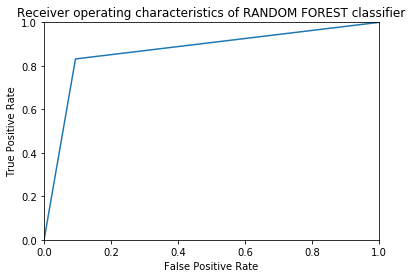

In [230]:
print('Area under Curve :',roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics of RANDOM FOREST classifier')
plt.show()

#### So,far the best algorithm that gives us good AUC value is RANDOM FOREST CLASSIFIER which gave us highest recall score as well along with AUC (Good True positive rate)

### Prediction on TEST1

In [75]:
yp = rfc.predict(T1)
len(yp),len(test1)

In [78]:
sub1 = pd.DataFrame()
sub1["ID"] = test1["Variable1"]
sub1['Class'] = yp
sub1.head()

,ID,Class
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [79]:
sub1.to_csv("machinelearning_saipraneeth_veldandi_us.csv", index = False)

### Prediction on TEST2

In [197]:
yp = sc.predict(T2)
len(yp),len(test2)

(72581, 72581)

In [199]:
sub2 = pd.DataFrame()
sub2["ID"] = test2["Variable1"]
sub2['Class'] = yp
sub2.head()

,ID,Class
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [200]:
sub2.to_csv("machinelearning_saipraneeth_veldandi_dsp.csv", index = False)

## THE END................THANK YOU 